In [ ]:
## This notebook provide functions to run RNAplex for structure prediction and VARNA for 2nd structure visualization

In [1]:
import os
RNAplex = '/home/beiliu/anaconda3/bin/RNAplex'
from IPython.display import Image as img
from Bio.Seq import Seq

In [2]:
# RNAplex structure prediction
# dir for RNAplex prediction
os.system('mkdir RNAplex')
def get_RNA_plex_output(seq1, seq2, l = 40, c = 10, return_energy = False):
    '''
    function to run plex and get output
    seq1 and seq2 are the raw sequences
    seq2 will be the sequence comes first in the output seq_total
    l is the Maximal length of an interaction 
    c is Cost to add to each nucleotide in a duplex
    energy: return energy or not, default is False
    '''
    with open('RNAplex/seq1.fa', 'w+') as f:
        f.write('>seq1\n')
        f.write(str(seq1))
    with open('RNAplex/seq2.fa', 'w+') as f:
        f.write('>seq2\n')
        f.write(str(seq2))

    # run RNAplex
    os.system(f'{RNAplex} -q RNAplex/seq2.fa -t RNAplex/seq1.fa \
    -l {l} -c {c} > RNAplex/predict_result2.txt')

    # process RNAplex output and get duplex sequence and dbn
    with open('RNAplex/predict_result2.txt', 'r') as f:
        x = f.readlines()[-1]
#     print(x)
    # no reasonable predicted structure
    if x[0] == '>':
        return [0, 0, 0, 0, '..', 'AA', 0]
    else:
        try:
            dbn, pos_l, _, pos_r, energy, _, _ = x.split()
        except:
            dbn, pos_l, _, pos_r = x.split()[:4]
            energy = '(0)'

        [pos1_l, pos1_r] = [int(i) for i in pos_l.split(',')]
        [pos2_l, pos2_r] = [int(i) for i in pos_r.split(',')]

        seq_l = seq1[pos1_l-1:pos1_r]
        seq_R = seq2[pos2_l-1:pos2_r]
        seq_total = seq_l + '&' + seq_R
        
    if return_energy:
        energy = float(energy[1:-1])
        return pos1_l, pos1_r, pos2_l, pos2_r, dbn, seq_total, energy
    else:
        return pos1_l, pos1_r, pos2_l, pos2_r, dbn, seq_total

mkdir: cannot create directory ‘RNAplex’: File exists


In [28]:
# vaRNA
# process DG clustering output and draw 2nd structures
vaRNA_script = '''#!/bin/bash \n \n\
java -cp /home/beiliu/Downloads/vaRNA/VARNAv3-93.jar \
fr.orsay.lri.varna.applications.VARNAcmd \
-sequenceDBN "{}" \
-structureDBN "{}" \
-algorithm linear \
-baseInner "#334455" \
-baseName "#334455" \
-baseOutline "#334455" \
-bp "#334455" \
-bpStyle "line" \
-flat true -resolution "{}"  \
-highlightRegion "{}-{}:fill=#f0a1bf" \
-rotation "{}" -title "{}" \
-titleSize 10 -o {}.png
'''
# function to show 2nd structure image
def show_structure(dbn, seq, name1, name2, rotation = 20, suffix = '', res=2, arms = '',
                  highlight = (0, 0)):
    '''
    dbn, seq is the structure prediction results from get_RNA_plex_output (dbn and the corresponding RNA sequences)
    name1, name2 and arms are the names of the 2 strands plus the name of the interaction
    rotation is the layout of the output vaRNA figure
    suffix is the output path follow the directory /home/beiliu/scratch/KARR_seq/Tong_duplex_pred/vaRNA/vaRNA_output
    res is the resolution
    highlight (a 2-element tuple) is the position interval that you want to highlight in the structure
    '''
    with open(f'/home/beiliu/KARR_seq/RNAplex/run_vaRNA.sh', 'w+') as f:
        f.write(vaRNA_script.format(seq, dbn, res,
                                    highlight[0], highlight[1] ,rotation,
                                    f'{name1}_{name2}_{arms}',
                                    f'/home/beiliu/KARR_seq/RNAplex/vaRNA_output{suffix}'))
    os.system('bash /home/beiliu/KARR_seq/RNAplex/run_vaRNA.sh')

1 9 115 125 (((((((((&.))))))))). GAGGCCCAG&GCTGGGCCTCG


java.lang.IndexOutOfBoundsException: Index -1 out of bounds for length 20
	at java.base/jdk.internal.util.Preconditions.outOfBounds(Preconditions.java:64)
	at java.base/jdk.internal.util.Preconditions.outOfBoundsCheckIndex(Preconditions.java:70)
	at java.base/jdk.internal.util.Preconditions.checkIndex(Preconditions.java:248)
	at java.base/java.util.Objects.checkIndex(Objects.java:372)
	at java.base/java.util.ArrayList.get(ArrayList.java:459)
	at fr.orsay.lri.varna.models.rna.RNA.getBaseAt(Unknown Source)
	at fr.orsay.lri.varna.models.rna.RNA.getBasesBetween(Unknown Source)
	at fr.orsay.lri.varna.models.annotations.HighlightRegionAnnotation.parseHighlightRegionAnnotation(Unknown Source)
	at fr.orsay.lri.varna.models.VARNAConfigLoader.applyHighlightRegion(Unknown Source)
	at fr.orsay.lri.varna.models.VARNAConfigLoader.applyValues(Unknown Source)
	at fr.orsay.lri.varna.models.VARNAConfigLoader.retrieveParametersValues(Unknown Source)
	at fr.orsay.lri.varna.models.VARNAConfigLoader.createV

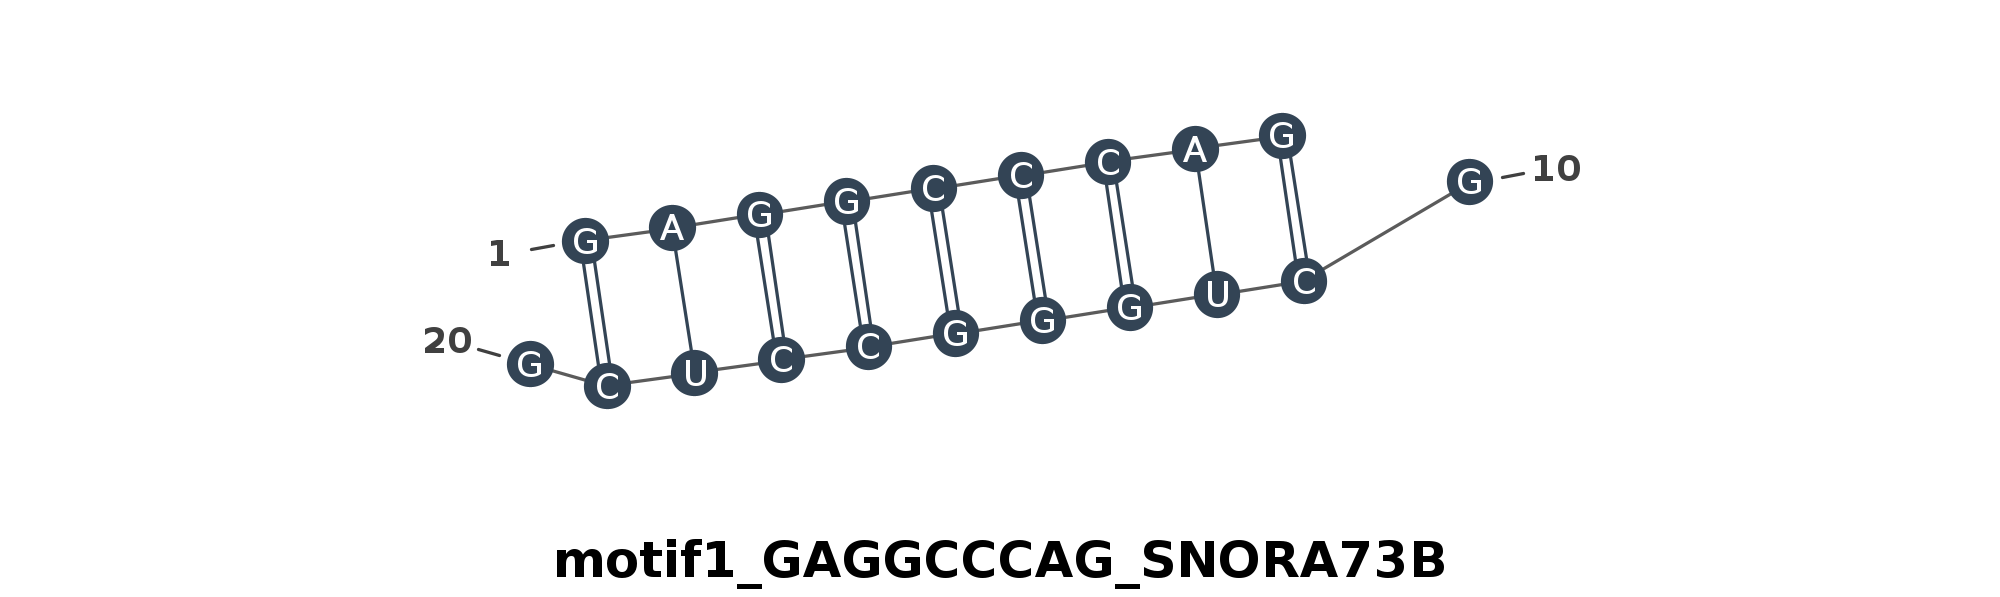

In [156]:
# # total motif
# motif1 = 'AGGCCCAGG'
# motif2 = 'GCCGCGU'
# motif3 = 'ACCACCG'

# # secreted protein motif
# motif1 = 'GAGGCCCAG'
# # motif2 = 'CCGCCGCCGC'
# # motif3 = 'AGAAG'

# i = 0
# seq_ = (seq1, 'SNORA73A')
# seq_ = (seq2, 'SNORA73B')
# motif = [motif1, motif2, motif3][i]
# pos1_l, pos1_r, pos2_l, pos2_r, dbn, seq_total \
# = get_RNA_plex_output(motif, 
#                       seq_[0], 
#                      c = 1, l=100)
# print(pos1_l, pos1_r, pos2_l, pos2_r, dbn, seq_total)

# show_structure(dbn, seq_total.replace('T', 'U'), f'motif{i+1}', motif, rotation = 90, 
#                suffix = 'dummy', arms = seq_[1], res=5)
# prefix = '/home/beiliu/scratch/KARR_seq/Tong_duplex_pred/vaRNA/'
# img(f'{prefix}vaRNA_outputdummy.png')

In [30]:
print('''
usage: run get_RNA_plex_output(seq1, seq2, l = 40, c = 10) to get pos1_l, pos1_r, pos2_l, pos2_r, dbn, seq_total
then run show_structure()

e.g.:
pos1_l, pos1_r, pos2_l, pos2_r, dbn, seq_total \
= get_RNA_plex_output(seq1, seq2, c = 10, l=40)

show_structure(structure, seq1.replace('T', 'U'), f'motif{i+1}', motif, rotation = 0, 
               suffix = 'dummy', arms = seq_[1], res=5, highlight=(pos2_l, pos2_r))
prefix = '/home/beiliu/KARR_seq/RNAplex/'
img(f'{prefix}vaRNA_outputdummy.png')

''')


usage: run get_RNA_plex_output(seq1, seq2, l = 40, c = 10) to get pos1_l, pos1_r, pos2_l, pos2_r, dbn, seq_total
then run show_structure()

e.g.:
pos1_l, pos1_r, pos2_l, pos2_r, dbn, seq_total = get_RNA_plex_output(seq1, seq2, c = 10, l=40)

show_structure(structure, seq1.replace('T', 'U'), f'motif{i+1}', motif, rotation = 0, 
               suffix = 'dummy', arms = seq_[1], res=5, highlight=(pos2_l, pos2_r))
prefix = '/home/beiliu/scratch/KARR_seq/Tong_duplex_pred/vaRNA/'
img(f'{prefix}vaRNA_outputdummy.png')




Output file: /home/beiliu/scratch/KARR_seq/Tong_duplex_pred/vaRNA/vaRNA_outputdummy.png



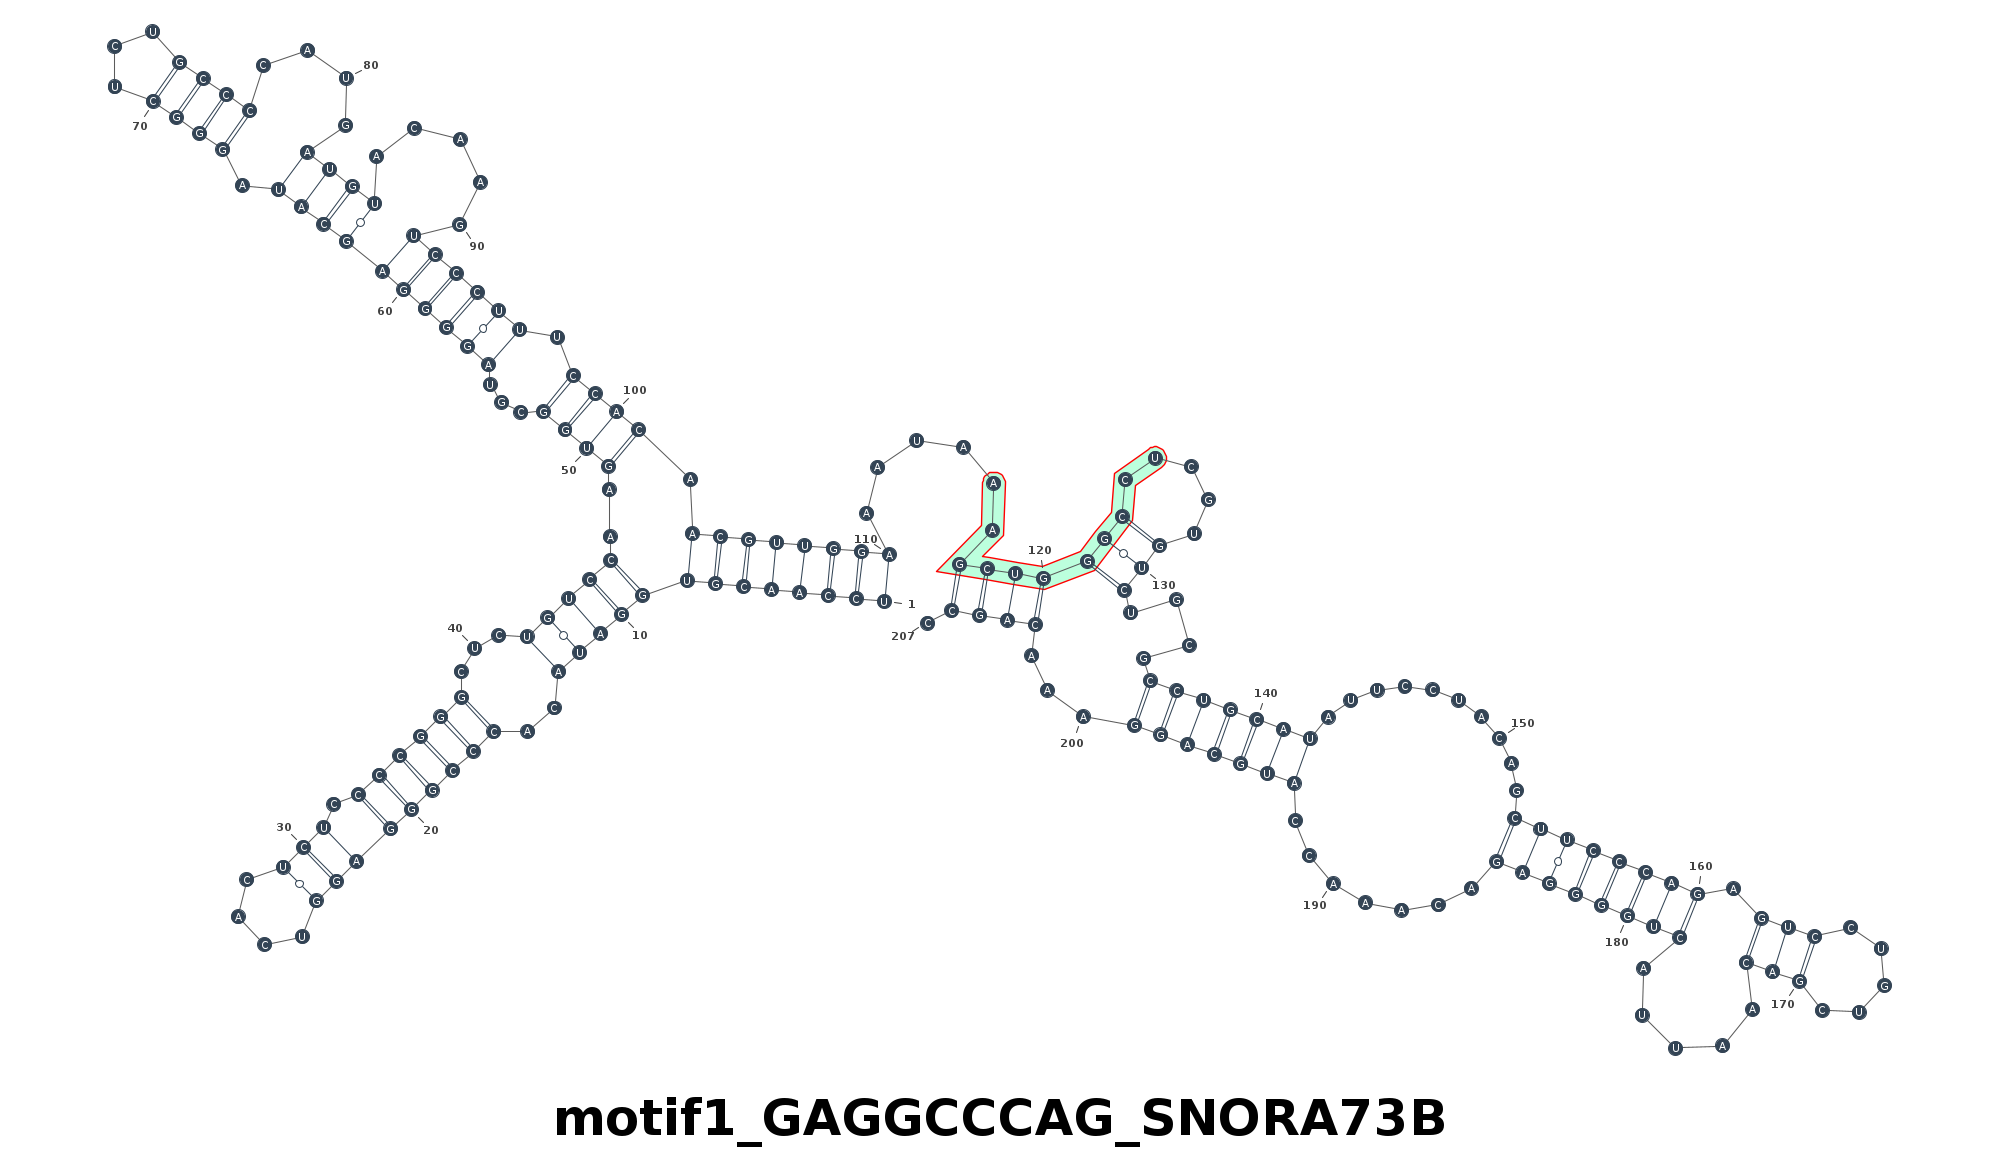

In [108]:
# show_structure(structure, seq1.replace('T', 'U'), f'motif{i+1}', motif, rotation = 0, 
#                suffix = 'dummy', arms = seq_[1], res=5, highlight=(pos2_l, pos2_r))
# prefix = '/home/beiliu/scratch/KARR_seq/Tong_duplex_pred/vaRNA/'
# img(f'{prefix}vaRNA_outputdummy.png')